In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
# Generate a LINEARLY separable dataset
X_linear, y_linear = make_blobs(n_samples=500, centers=2, n_features=2, random_state=42)
y_linear = np.where(y_linear == 0, -1, 1)  # Convert to -1, 1 for perceptron

# Generate a NON-LINEAR dataset
X_nonlinear, y_nonlinear = make_moons(n_samples=500, noise=0.2, random_state=42)
y_nonlinear = np.where(y_nonlinear == 0, -1, 1)  # Convert to -1, 1

# Used generated samples rather than datasets as its just a single perceptron

In [8]:
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)
X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear = train_test_split(X_nonlinear, y_nonlinear, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_linear = scaler.fit_transform(X_train_linear)
X_test_linear = scaler.transform(X_test_linear)
X_train_nonlinear = scaler.fit_transform(X_train_nonlinear)
X_test_nonlinear = scaler.transform(X_test_nonlinear)

In [10]:
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                if y[idx] * (np.dot(x_i, self.weights) + self.bias) <= 0:
                    self.weights += self.lr * y[idx] * x_i
                    self.bias += self.lr * y[idx]

    def predict(self, X):
        return np.where(np.dot(X, self.weights) + self.bias >= 0, 1, -1)

In [11]:
perceptron_linear = Perceptron(learning_rate=0.01, epochs=1000)
perceptron_linear.fit(X_train_linear, y_train_linear)
y_pred_linear = perceptron_linear.predict(X_test_linear)
acc_linear = np.mean(y_pred_linear == y_test_linear)

In [12]:
perceptron_nonlinear = Perceptron(learning_rate=0.01, epochs=1000)
perceptron_nonlinear.fit(X_train_nonlinear, y_train_nonlinear)
y_pred_nonlinear = perceptron_nonlinear.predict(X_test_nonlinear)
acc_nonlinear = np.mean(y_pred_nonlinear == y_test_nonlinear)

In [13]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title(title)
    plt.show()


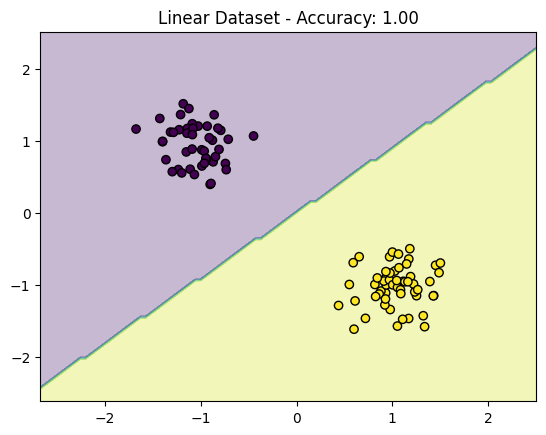

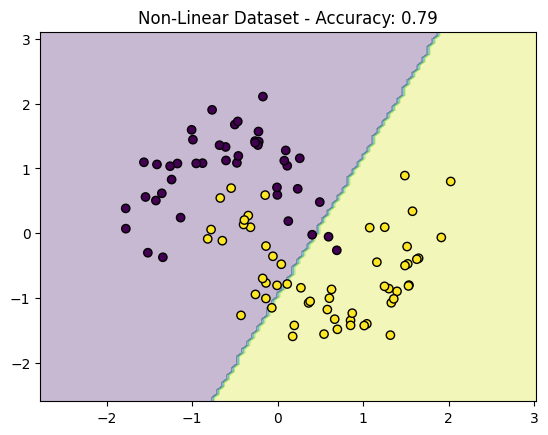

In [14]:
plot_decision_boundary(perceptron_linear, X_test_linear, y_test_linear, f'Linear Dataset - Accuracy: {acc_linear:.2f}')
plot_decision_boundary(perceptron_nonlinear, X_test_nonlinear, y_test_nonlinear, f'Non-Linear Dataset - Accuracy: {acc_nonlinear:.2f}')